In [52]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np

# Define una función de activación personalizada que utiliza la función softmax.
def softmax_v2(x):
    return tf.nn.softmax(x)

# Carga y preprocesa los datos del conjunto de datos MNIST.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normaliza los datos de entrenamiento y prueba dividiéndolos por 255.0.
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define el modelo secuencial.
model = Sequential([
    # Aplana las imágenes de 28x28 píxeles a un vector de 784 elementos.
    Flatten(input_shape=(28, 28)),
    # Capa densa con 128 unidades y función de activación ReLU.
    Dense(128, activation='relu'),
    # Otra capa densa con 128 unidades y función de activación ReLU.
    Dense(128, activation='relu'),
    # Capa de salida con 10 unidades (correspondientes a las 10 clases de dígitos) y la función de activación personalizada softmax.
    Dense(10, activation=softmax_v2)
])

# Compila el modelo especificando el optimizador, la función de pérdida y las métricas de evaluación.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrena el modelo con los datos de entrenamiento durante 3 épocas.
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8795 - loss: 0.4180
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9696 - loss: 0.0973
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9793 - loss: 0.0658


In [53]:
# Evalúa el modelo con los datos de prueba para obtener la pérdida y la precisión.
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)  # Muestra la pérdida del modelo.
print(val_acc)  # Muestra la precisión del modelo.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0831
0.07589240372180939
0.9775999784469604


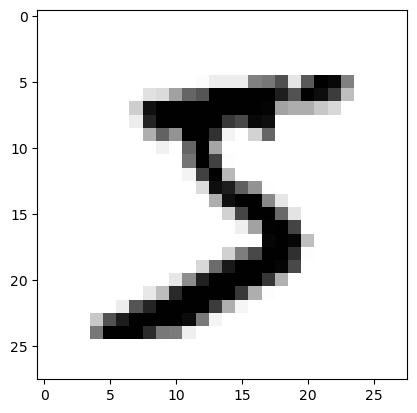

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [54]:
import matplotlib.pyplot as plt

# Muestra la primera imagen del conjunto de entrenamiento.
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
print(x_train[0])  # Muestra los valores de los píxeles de la imagen.

In [55]:
# Guarda el modelo utilizando la extensión .keras.
model.save('epic_num_reader.keras')

In [56]:
# Carga el modelo guardado, especificando la función de activación personalizada en custom_objects.
custom_objects = {'softmax_v2': softmax_v2}
new_model = tf.keras.models.load_model('epic_num_reader.keras', custom_objects=custom_objects)

In [57]:
# Realiza predicciones con el modelo cargado utilizando los datos de prueba.
predictions = new_model.predict(x_test)
print(predictions)  # Muestra las predicciones para el primer lote de datos de prueba.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[4.4280273e-09 3.7741897e-06 2.2990771e-06 ... 9.9995220e-01
  6.9332486e-08 1.1431453e-07]
 [5.8903975e-08 2.1225523e-04 9.9978513e-01 ... 2.8372348e-08
  5.4038254e-09 2.7460295e-10]
 [1.3609769e-06 9.9810225e-01 2.5375270e-05 ... 1.1486978e-03
  4.1493764e-05 2.3383442e-05]
 ...
 [1.2836066e-10 6.5086979e-08 2.9790492e-10 ... 2.8249092e-06
  2.7743308e-08 1.3364187e-06]
 [3.4023218e-09 3.1138335e-08 6.3015149e-11 ... 1.7850530e-09
  1.2818494e-05 4.2746304e-08]
 [7.7746741e-08 8.4584967e-10 2.6769674e-08 ... 3.1925532e-11
  2.9271077e-09 1.8219233e-11]]


In [58]:
import numpy as np

# Muestra la clase predicha para la primera imagen del conjunto de prueba.
print(np.argmax(predictions[0]))

7


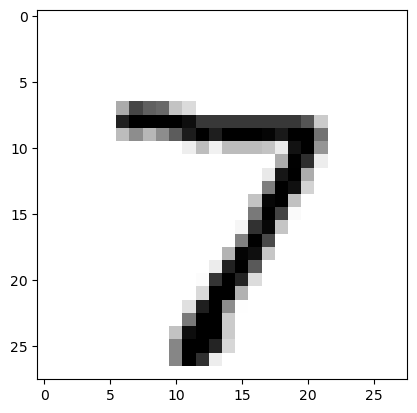

In [59]:
# Muestra la primera imagen del conjunto de prueba.
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()